In [1]:

import pandas as pd 
pd.options.display.max_columns = None 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [2]:

data= pd.read_csv('C:/Users/ASUS/Desktop/streamlit/issue app/Disease.csv')

In [4]:
data.head()


,Age,Sex,Blood_P,Cholesterol,So_Po,Disease
0,23,F,HIGH,HIGH,25.355,DiseaseB
1,47,M,LOW,HIGH,13.093,DiseaseE
2,47,M,LOW,HIGH,10.114,DiseaseE
3,28,F,NORMAL,HIGH,7.798,DiseaseA
4,61,F,LOW,HIGH,18.043,DiseaseB


In [5]:
data.shape


(200, 6)

In [6]:
colonnes = data.columns.to_list()
colonnes

['Age', 'Sex', 'Blood_P', 'Cholesterol', 'So_Po', 'Disease']

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   Blood_P      200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   So_Po        200 non-null    float64
 5   Disease      200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
data.describe()


,Age,So_Po
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
data.describe(include=['object'])


,Sex,Blood_P,Cholesterol,Disease
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DiseaseB
freq,104,77,103,91


In [10]:
features=['Age', 'Sex', 'Blood_P', 'Cholesterol', 'So_Po']


In [11]:
X = data[features]
y = data['Disease']


In [12]:
X.head()


,Age,Sex,Blood_P,Cholesterol,So_Po
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [13]:
y.head()


0    DiseaseB
1    DiseaseE
2    DiseaseE
3    DiseaseA
4    DiseaseB
Name: Disease, dtype: object

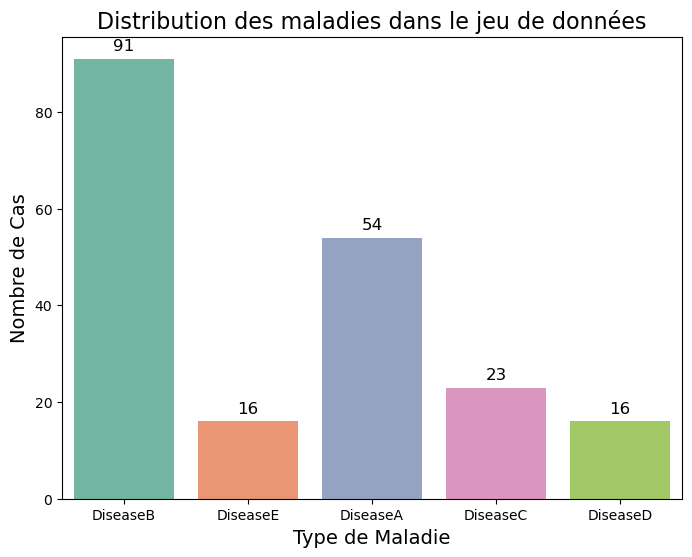

In [99]:
#data exploration

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=data['Disease'], palette='Set2')
plt.title('Distribution des maladies dans le jeu de données', fontsize=16)
plt.xlabel('Type de Maladie', fontsize=14)
plt.ylabel('Nombre de Cas', fontsize=14)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', 
                       xytext=(0, 9), textcoords='offset points')

plt.show()

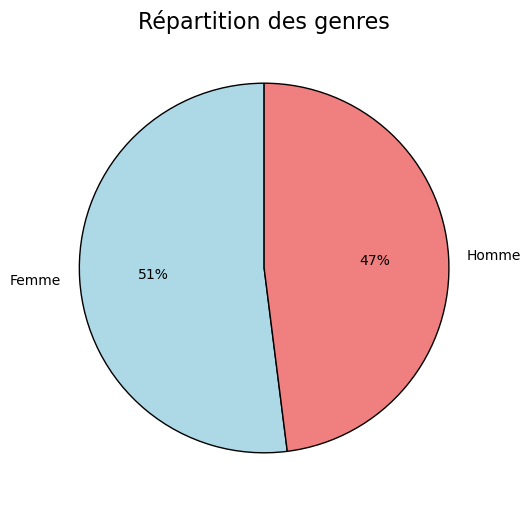

In [108]:

gender_counts = data['Sex'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot.pie(
    autopct=lambda p: f'{int(p)}%', 
    labels=['Femme', 'Homme'],      
    colors=['lightblue', 'lightcoral'], 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Répartition des genres', fontsize=16)
plt.ylabel('')  
plt.show()

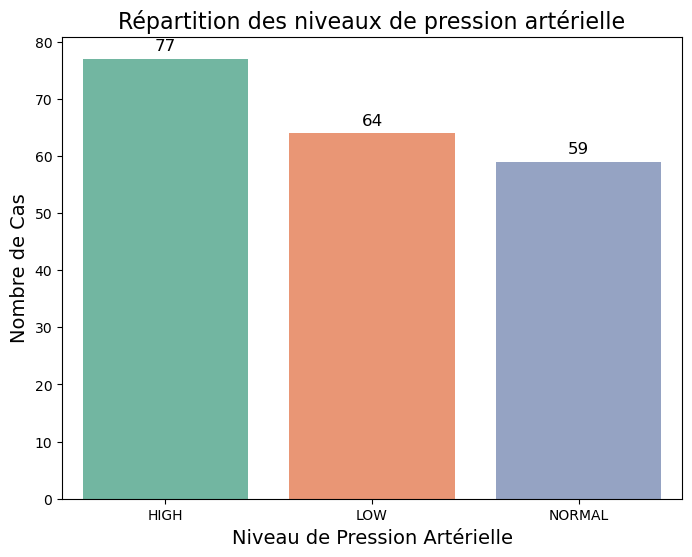

In [116]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Blood_P'], palette='Set2')

plt.title('Répartition des niveaux de pression artérielle', fontsize=16)
plt.xlabel('Niveau de Pression Artérielle', fontsize=14)
plt.ylabel('Nombre de Cas', fontsize=14)

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),  
                       ha='center', va='center', fontsize=12, color='black', 
                       xytext=(0, 9), textcoords='offset points')

plt.show()

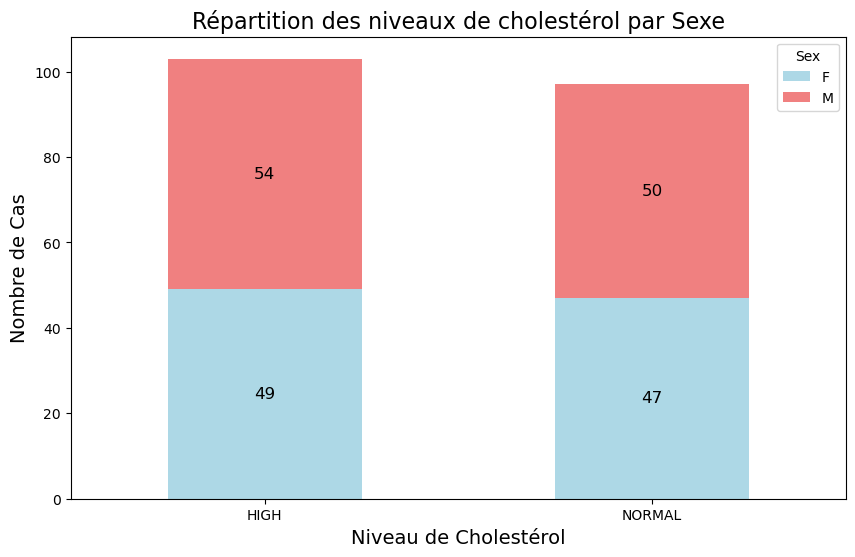

In [117]:
cholesterol_sex_counts = data.groupby(['Cholesterol', 'Sex']).size().unstack()
ax = cholesterol_sex_counts.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], figsize=(10, 6))
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax.annotate(f'{int(height)}', (x, y), ha='center', va='center', fontsize=12, color='black')

plt.title('Répartition des niveaux de cholestérol par Sexe', fontsize=16)
plt.xlabel('Niveau de Cholestérol', fontsize=14)
plt.ylabel('Nombre de Cas', fontsize=14)
plt.xticks(rotation=0)  

plt.show()


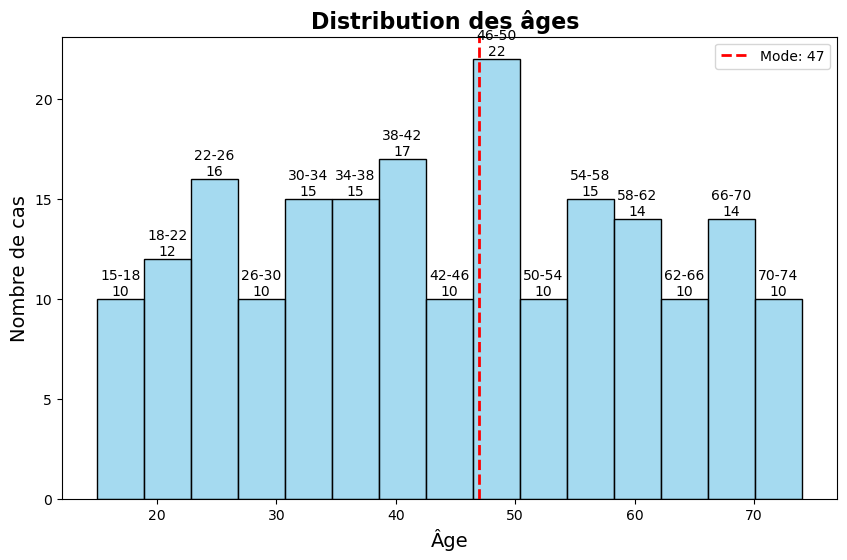

In [122]:
mode_age = data['Age'].mode()[0] 
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['Age'], bins=15, kde=False, color='skyblue')

plt.axvline(mode_age, color='red', linestyle='--', linewidth=2, label=f'Mode: {mode_age}')

for p in ax.patches:
    center_x = p.get_x() + p.get_width() / 2  # Centre de la barre
    freq = int(p.get_height())  # Fréquence (hauteur de la barre)
    age_range = f"{int(p.get_x())}-{int(p.get_x() + p.get_width())}"  # Intervalle d'âge
    
    if freq > 0:  
        plt.text(center_x, freq, f'{age_range}\n{freq}', 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution des âges ', fontsize=16, fontweight='bold')
plt.xlabel('Âge', fontsize=14)
plt.ylabel('Nombre de cas', fontsize=14)

plt.legend()

plt.show()


In [14]:
X = X.values
y = y.values
X[0:10,:]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368]], dtype=object)

In [15]:
#encodage de sex et cholestrol

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
X[:,1] = label.fit_transform(X[:,1])
X[:,3] = label.fit_transform(X[:,3])

In [16]:
X[0:10,:]

array([[23, 0, 'HIGH', 0, 25.355],
       [47, 1, 'LOW', 0, 13.093],
       [47, 1, 'LOW', 0, 10.114],
       [28, 0, 'NORMAL', 0, 7.798],
       [61, 0, 'LOW', 0, 18.043],
       [22, 0, 'NORMAL', 0, 8.607],
       [49, 0, 'NORMAL', 0, 16.275],
       [41, 1, 'LOW', 0, 11.037],
       [60, 1, 'NORMAL', 0, 15.171],
       [43, 1, 'LOW', 1, 19.368]], dtype=object)

In [17]:
#encodage de blood presseur
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Blood_P',OneHotEncoder(),[2])],remainder = 'passthrough')

In [18]:
X.shape


(200, 5)

In [19]:
X = ct.fit_transform(X)


In [20]:
X.shape


(200, 7)

In [21]:
#avant OneHotEncoder   
X[0:10,:]


array([[1.0, 0.0, 0.0, 23, 0, 0, 25.355],
       [0.0, 1.0, 0.0, 47, 1, 0, 13.093],
       [0.0, 1.0, 0.0, 47, 1, 0, 10.114],
       [0.0, 0.0, 1.0, 28, 0, 0, 7.798],
       [0.0, 1.0, 0.0, 61, 0, 0, 18.043],
       [0.0, 0.0, 1.0, 22, 0, 0, 8.607],
       [0.0, 0.0, 1.0, 49, 0, 0, 16.275],
       [0.0, 1.0, 0.0, 41, 1, 0, 11.037],
       [0.0, 0.0, 1.0, 60, 1, 0, 15.171],
       [0.0, 1.0, 0.0, 43, 1, 1, 19.368]], dtype=object)

In [22]:
if X.shape[1] == 7:
    X = X[:,1:]


In [23]:
X.shape


(200, 6)

In [24]:
#après OneHotEncoder
X[0:10,:]


array([[0.0, 0.0, 23, 0, 0, 25.355],
       [1.0, 0.0, 47, 1, 0, 13.093],
       [1.0, 0.0, 47, 1, 0, 10.114],
       [0.0, 1.0, 28, 0, 0, 7.798],
       [1.0, 0.0, 61, 0, 0, 18.043],
       [0.0, 1.0, 22, 0, 0, 8.607],
       [0.0, 1.0, 49, 0, 0, 16.275],
       [1.0, 0.0, 41, 1, 0, 11.037],
       [0.0, 1.0, 60, 1, 0, 15.171],
       [1.0, 0.0, 43, 1, 1, 19.368]], dtype=object)

In [26]:
data.columns


Index(['Age', 'Sex', 'Blood_P', 'Cholesterol', 'So_Po', 'Disease'], dtype='object')

In [27]:
features2=['Age', 'Sex', 'Blood_P', 'Cholesterol', 'So_Po']


In [28]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state = 0)

In [29]:
X_test[0:5,:]


array([[1.0, 0.0, 23, 1, 0, 7.298],
       [0.0, 1.0, 28, 0, 0, 12.879],
       [1.0, 0.0, 42, 1, 0, 20.013],
       [0.0, 0.0, 20, 1, 1, 35.639],
       [0.0, 1.0, 25, 1, 0, 19.011]], dtype=object)

In [30]:
#standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [32]:
X_train_sc[0,:]


array([-0.70710678, -0.57735027,  0.14184317,  0.81649658, -0.93541435,
       -0.76495865])

In [33]:
#modeling
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : [1,3,5,7,9,11,13,15]}
model = KNeighborsClassifier()
clf = GridSearchCV(model,parameters, scoring='accuracy', cv=5)
grille = clf.fit(X_train_sc,y_train)
print(grille.best_params_)
print(grille.best_score_)

{'n_neighbors': 13}
0.875


In [34]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=13)

In [35]:
y_pred_knn = knn.predict(X_test_sc)
print('Confusion matrix KNN \n', confusion_matrix(y_test,y_pred_knn))
print('Accuracy of model KNN', accuracy_score(y_test,y_pred_knn))

Confusion matrix KNN 
 [[24  1  0  0  0]
 [ 7 31  0  1  0]
 [ 0  2  6  0  0]
 [ 0  1  1  2  0]
 [ 0  0  0  0  4]]
Accuracy of model KNN 0.8375


In [36]:
for i in range(10):
    print(y_test[i], y_pred_knn[i])
print(classification_report(y_test,y_pred_knn))


DiseaseE DiseaseE
DiseaseA DiseaseA
DiseaseB DiseaseB
DiseaseB DiseaseB
DiseaseB DiseaseA
DiseaseA DiseaseA
DiseaseA DiseaseA
DiseaseA DiseaseA
DiseaseB DiseaseB
DiseaseA DiseaseA
              precision    recall  f1-score   support

    DiseaseA       0.77      0.96      0.86        25
    DiseaseB       0.89      0.79      0.84        39
    DiseaseC       0.86      0.75      0.80         8
    DiseaseD       0.67      0.50      0.57         4
    DiseaseE       1.00      1.00      1.00         4

    accuracy                           0.84        80
   macro avg       0.84      0.80      0.81        80
weighted avg       0.84      0.84      0.83        80



In [73]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)


In [74]:
for i in range(10):
    print(y_test[i],y_pred_dt[i])
print('Confusion matrix decision tree \n', confusion_matrix(y_test,y_pred_dt))
print('Accuracy of model decision tree:', accuracy_score(y_test,y_pred_dt))

DiseaseE DiseaseE
DiseaseA DiseaseA
DiseaseB DiseaseB
DiseaseB DiseaseB
DiseaseB DiseaseB
DiseaseA DiseaseA
DiseaseA DiseaseA
DiseaseA DiseaseA
DiseaseB DiseaseB
DiseaseA DiseaseA
Confusion matrix decision tree 
 [[24  1  0  0  0]
 [ 0 39  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  4]]
Accuracy of model decision tree: 0.9875


In [63]:
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X,y)

DecisionTreeClassifier(max_depth=5)

In [66]:
tree.export_graphviz(model,feature_names = features2,\
                    out_file = 'dt_disease.dot',\
                    label = 'all',\
                    filled = True,\
                    rounded = True)

In [67]:
from graphviz import Source

# Charger et visualiser le fichier .dot
with open("dt_disease.dot", "r") as file:
    dot_graph = file.read()

graph = Source(dot_graph)
graph.render("dt_disease", format="png", cleanup=True)  # Génère un fichier PNG
graph.view() 

'dt_disease.pdf'

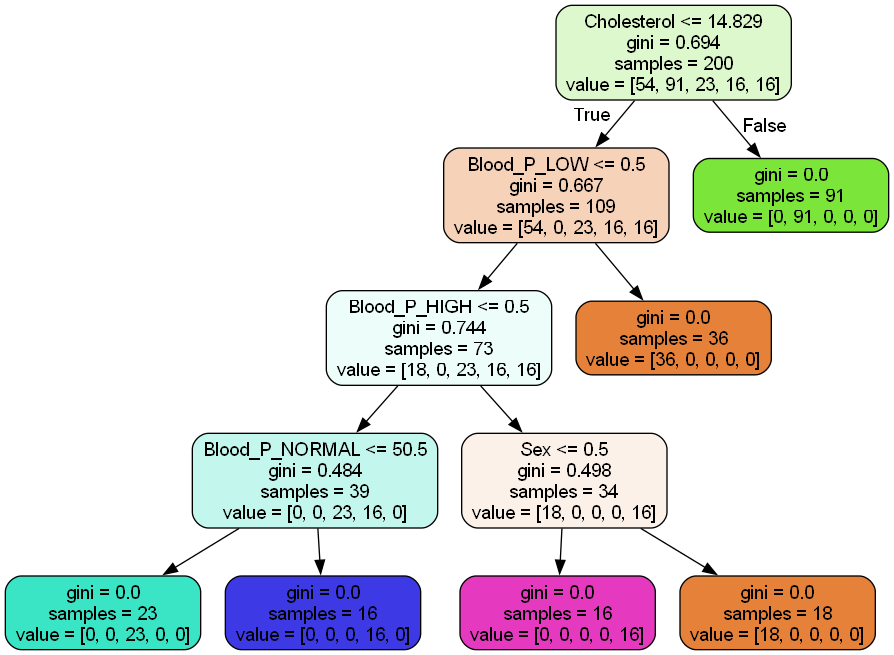

In [62]:
from IPython.display import Image
Image('dt_disease1.png')

In [68]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
y_pred_rf = rf.predict(X_test)
print('Confusion matrix of Random Forest \n', confusion_matrix(y_test,y_pred_rf))
print('Accuracy of model Random Forest:', accuracy_score(y_test,y_pred_rf))

Confusion matrix of Random Forest 
 [[24  1  0  0  0]
 [ 0 39  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  4]]
Accuracy of model Random Forest: 0.9875


In [76]:
print(classification_report(y_test,y_pred_rf))


              precision    recall  f1-score   support

    DiseaseA       1.00      0.96      0.98        25
    DiseaseB       0.97      1.00      0.99        39
    DiseaseC       1.00      1.00      1.00         8
    DiseaseD       1.00      1.00      1.00         4
    DiseaseE       1.00      1.00      1.00         4

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [77]:
#svm linear
from sklearn.svm import SVC
linear_SVM = SVC(kernel='linear')
linear_SVM.fit(X_train_sc,y_train)

SVC(kernel='linear')

In [79]:
y_predictSVM_l = linear_SVM.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictSVM_l))
print('Accuracy of model linear SVM {0:.3f}'.format(accuracy_score(y_test,y_predictSVM_l)))

[[24  1  0  0  0]
 [ 0 38  0  1  0]
 [ 0  0  8  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  4]]
Accuracy of model linear SVM 0.975


In [81]:
#svm kernel
kernel_SVM = SVC(kernel='rbf')
kernel_SVM.fit(X_train_sc,y_train)
y_predictSVM_k = kernel_SVM.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictSVM_k))
print('Accuracy of model kernel  SVM {0:.3f}'.format(accuracy_score(y_test,y_predictSVM_k)))

[[24  1  0  0  0]
 [ 5 33  0  1  0]
 [ 0  0  8  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  4]]
Accuracy of model kernel  SVM 0.912


In [82]:
#logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_sc,y_train)

LogisticRegression()

In [83]:

y_predictLR = LR.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictLR))
print('Accuracy of model Logistic Regression {0:.3f}'.format(accuracy_score(y_test,y_predictLR)))

[[23  2  0  0  0]
 [ 0 38  0  1  0]
 [ 0  0  8  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  4]]
Accuracy of model Logistic Regression 0.963


In [87]:
from sklearn.metrics import accuracy_score
from tabulate import tabulate
import pandas as pd

accuracy_knn=accuracy_score(y_test,y_pred_knn)
accuracy_lr = accuracy_score(y_test,y_predictLR)
accuracy_svm_li=accuracy_score(y_test,y_predictSVM_l)
accuracy_svm_ke=accuracy_score(y_test,y_predictSVM_k)
accuracy_dt=accuracy_score(y_test,y_pred_dt)
accuracy_rf=accuracy_score(y_test,y_pred_rf)
results = {
    'Algorithm': ['Optimized kNN', 'Decision Tree', 'Random Forest','linear SVM ','kernel SVM', 'Logistic Regression'],
    'Accuracy': [accuracy_knn, accuracy_dt, accuracy_rf,accuracy_svm_li,accuracy_svm_ke, accuracy_lr]
}

# Conversion en DataFrame
df_results = pd.DataFrame(results)

table = tabulate(df_results, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)

╒═════════════════════╤════════════╕
│ Algorithm           │   Accuracy │
╞═════════════════════╪════════════╡
│ Optimized kNN       │     0.8375 │
├─────────────────────┼────────────┤
│ Decision Tree       │     0.9875 │
├─────────────────────┼────────────┤
│ Random Forest       │     0.9875 │
├─────────────────────┼────────────┤
│ linear SVM          │     0.975  │
├─────────────────────┼────────────┤
│ kernel SVM          │     0.9125 │
├─────────────────────┼────────────┤
│ Logistic Regression │     0.9625 │
╘═════════════════════╧════════════╛
